In [1]:
import keras
import cv2
import numpy as np
import cv2
import os
import glob
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation,Dropout
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.models import Model
from keras.layers import merge, Input
from keras import applications

In [3]:
def image_to_features(image,size=(224,224)):
    return cv2.resize(image,size)

In [4]:
img_dir = "C:/Users/shk1ply/tensor/train" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
labels = []
for (i,f1) in enumerate(files):
    img = cv2.imread(f1)
    features = image_to_features(img)
    data.append(features)
    label = f1.split(os.path.sep)[-1].split(".")[0]
    labels.append(label)
    # show an update every 1,000 images
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(f1)))
        
print (len(data))


[INFO] processed 1000/43
[INFO] processed 2000/43
[INFO] processed 3000/42
[INFO] processed 4000/42
[INFO] processed 5000/42
[INFO] processed 6000/42
[INFO] processed 7000/42
[INFO] processed 8000/42
[INFO] processed 9000/42
[INFO] processed 10000/42
[INFO] processed 11000/42
[INFO] processed 12000/42
[INFO] processed 13000/43
[INFO] processed 14000/43
[INFO] processed 15000/43
[INFO] processed 16000/42
[INFO] processed 17000/42
[INFO] processed 18000/42
[INFO] processed 19000/42
[INFO] processed 20000/42
[INFO] processed 21000/42
[INFO] processed 22000/42
[INFO] processed 23000/42
[INFO] processed 24000/42
25000


In [5]:
print (len(labels))
data = np.array(data,dtype=np.uint8)
labels = np.array(labels)

print (data.shape)
print (labels.shape)

25000
(25000, 224, 224, 3)
(25000,)


In [6]:
(trainData, valData, trainLabels, valLabels) = train_test_split(data, labels, test_size=0.25, random_state=42)

print (trainData.shape)
print (trainLabels.shape)
print (valData.shape)
print (valLabels.shape)


(18750, 224, 224, 3)
(18750,)
(6250, 224, 224, 3)
(6250,)


In [7]:
#Integer Encoding
le = preprocessing.LabelEncoder()
trainlabels_integer_encoded = le.fit_transform(trainLabels)
valLabels_integer_encoded = le.fit_transform(valLabels)

trainData = trainData.astype('float32')
valData = valData.astype('float32')

trainData /= 255
valData /= 255

trainLabels = keras.utils.to_categorical(trainlabels_integer_encoded,2)
valLabels = keras.utils.to_categorical(valLabels_integer_encoded,2)

print (trainData.shape)
print (trainLabels.shape)
print (valData.shape)
print (valLabels.shape)

(18750, 224, 224, 3)
(18750, 2)
(6250, 224, 224, 3)
(6250, 2)


In [8]:
image_input = Input(shape=(224, 224, 3))

model = applications.VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [9]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(256, activation='relu', name='fc1')(x)
#x = Dense(128, activation='relu', name='fc2')(x)
x = (Dropout(0.5))(x)
out = Dense(2, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)
custom_vgg_model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [10]:
# freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-3]:
    layer.trainable = False

custom_vgg_model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [11]:
import time
custom_vgg_model2.compile(loss='binary_crossentropy',optimizer=keras.optimizers.SGD(lr=0.001,momentum=0.9),metrics=['accuracy'])

t=time.time()
#t = now()
hist = custom_vgg_model2.fit(trainData, trainLabels, batch_size=8, epochs=4, verbose=1, validation_data=(valData, valLabels))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(valData, valLabels, batch_size=8, verbose=1)


Train on 18750 samples, validate on 6250 samples
Epoch 1/4
18750/18750 [==============================] - 2508s 134ms/step - loss: 0.5234 - acc: 0.7089 - val_loss: 0.4798 - val_acc: 0.7845
Epoch 2/4
18750/18750 [==============================] - 2485s 133ms/step - loss: 0.4731 - acc: 0.7204 - val_loss: 0.3874 - val_acc: 0.8536
Epoch 3/4
18750/18750 [==============================] - 2489s 133ms/step - loss: 0.4580 - acc: 0.7010 - val_loss: 0.2687 - val_acc: 0.9122
Epoch 4/4
18750/18750 [==============================] - 2488s 133ms/step - loss: 0.4357 - acc: 0.7239 - val_loss: 0.2434 - val_acc: 0.9021
Training time: -9970.542022943497
6250/6250 [==============================] - 608s 97ms/step


In [12]:

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

[INFO] loss=0.2434, accuracy: 90.2080%


In [14]:
# show the accuracy on the testing set
#print("[INFO] evaluating on testing set...")
#(loss, accuracy) = custom_vgg_model2.evaluate(valData, valLabels,batch_size=128, verbose=1)
#print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
 
# dump the network architecture and weights to file
#print("[INFO] dumping architecture and weights to file...")
custom_vgg_model2.save('dogs_and_cats_CNN_custom_bottleneck1_from_part1.h5')

dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])


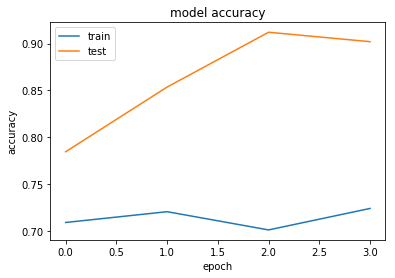

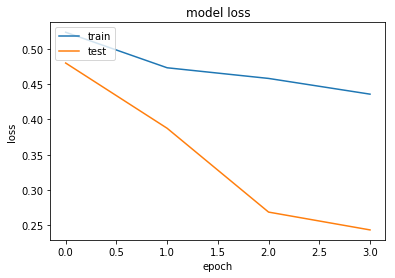

In [16]:
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Test 

[INFO] loading network architecture and weights...
[0.8910633  0.10893666]
[[0.8910633  0.10893666]]
0


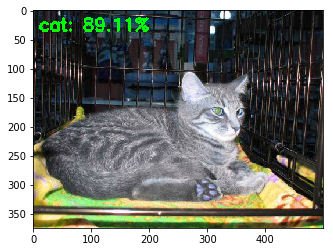

[INFO] Predicted: 0, Actual: 0


In [17]:
# initialize the class labels for the Kaggle dogs vs cats dataset
CLASSES = ["cat", "dog"]
 
# load the network
print("[INFO] loading network architecture and weights...")
new_model = load_model('dogs_and_cats_CNN_custom_bottleneck1_from_part1.h5')
#print("[INFO] testing on images in {}".format(args["test_images"]))
#Testing on one test image
test_image = cv2.imread('C:/Users/shk1ply/tensor/test1/3220.jpg')
test_features = image_to_features(test_image)/255.0
test_features = np.array([test_features])
probs = new_model.predict(test_features)[0]
print (probs)
#Just for printing actual return shape of predict method
prb = new_model.predict(test_features)
print (prb)
prediction = probs.argmax(axis=0)
print (prediction)
test_label = "{}: {:.2f}%".format(CLASSES[prediction],probs[prediction] * 100)
cv2.putText(test_image, test_label, (10, 35), cv2.FONT_HERSHEY_SIMPLEX,1.0, (0, 255, 0), 3)

plt.imshow(test_image,cmap='gray')
plt.show()
print("[INFO] Predicted: {}, Actual: {}".format(prediction,np.argmax(test_label)))



# Conclusion

In this notebook, we have used VGG16 archtecture and trained Fully connected layers keeping all convolution layer weight freeezed. As we can see I have trained it for 4 epochs. Accuracy --> Loss graph doesn't look good and this model needs hyper parameter tunning (Proper learning rate, Optimizer, Batch size etc.). It takes a lot of time because of resource constraint. 

Important thing is to understand the process flow (Pipeline) about bottleneck feature concept. Weight from this notebook will be used to fine-tune the network. While fine-tunning, we have to initialize the fully connected layer with this weight and then fine tune the network. This will be done in 7th notebook.

In [18]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________